In [ ]:
%%capture
!pip install netcdf4

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_pp = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov2p1(prec).nc"
PISCO_pp = xr.open_dataset(ruta_pp,decode_times=False)
PISCO_pp=PISCO_pp.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_pp["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)
#anual
pp_anual = PISCO_pp.sel(time= slice('1981-06-01', '2016-05-31')).groupby('time.year').sum('time')
pp_anual = pp_anual.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
#season
pp_filtro=PISCO_pp.sel(time=slice('1981-06-01T00:00:00.000000000','2016-05-31T12:00:00.000000000'))
pp_monthly = pp_filtro.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
#creando un dataframe
pp_df = pp_monthly.mean(dim=("latitude","longitude")).to_dataframe()
pp_df["month"] = pp_filtro["time"].dt.month
pp_df["year"] = pp_filtro["time"].dt.year
##separando por estaciones
pp_JJA = pp_df[(pp_df["month"]== 6) | (pp_df["month"]==7) | (pp_df["month"]==8) ]
pp_DJF = pp_df[(pp_df["month"]== 12) | (pp_df["month"]==1) | (pp_df["month"]==2) ]
pp_SON = pp_df[(pp_df["month"]== 9) | (pp_df["month"]==10) | (pp_df["month"]==11) ]
pp_MAM = pp_df[(pp_df["month"]== 3) | (pp_df["month"]==4) | (pp_df["month"]==5) ]
#Haciendo un resample
pp_DJF_yearly= pp_DJF.resample("1Y").sum()
pp_JJA_yearly= pp_JJA.resample("1Y").sum()
pp_SON_yearly= pp_SON.resample("1Y").sum()
pp_MAM_yearly= pp_MAM.resample("1Y").sum()

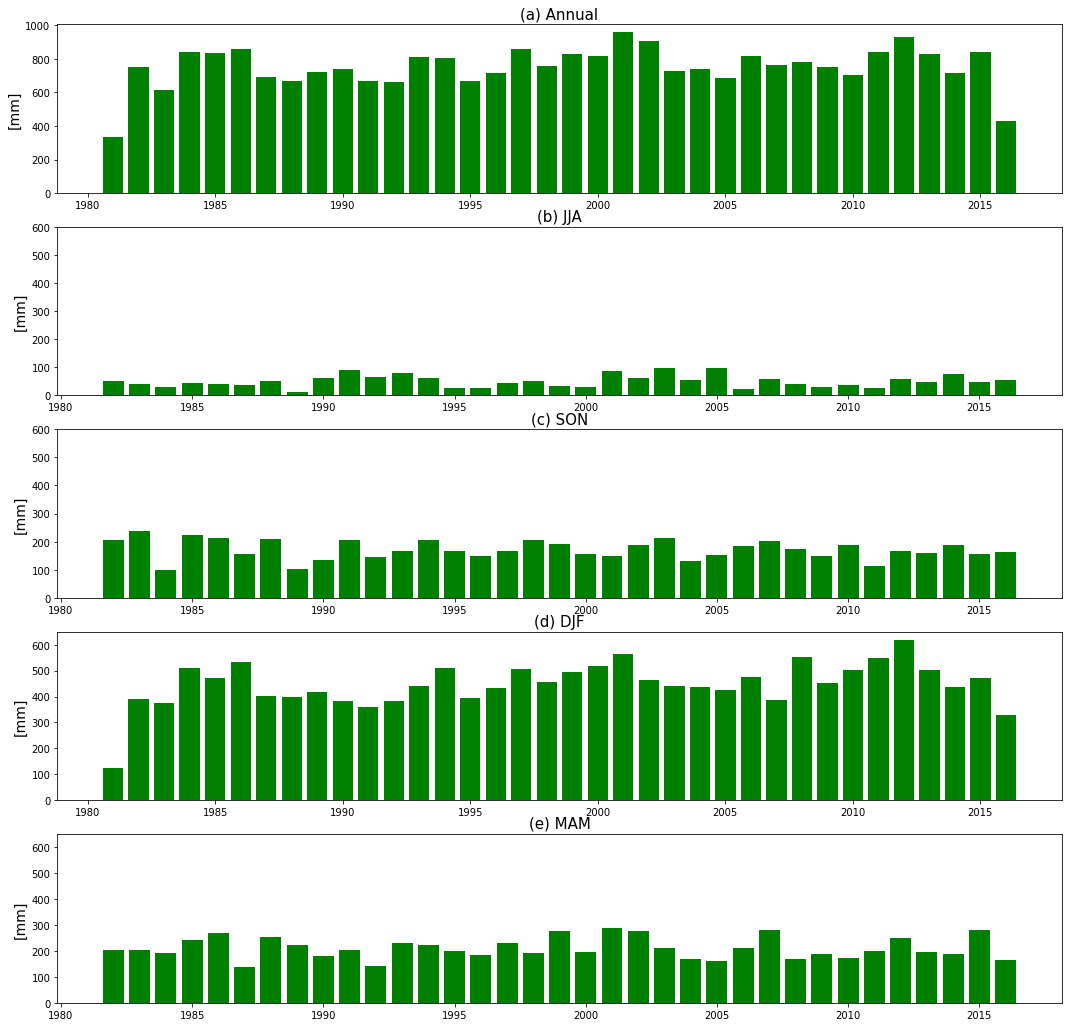

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(18, 18))
#ANUAL
ax1 = axs[0]
y = pp_anual.mean(dim=("latitude","longitude")).Prec.to_numpy()
x = pp_anual["year"].to_numpy()
ax1.bar(x,y, color="green")
ax1.set_ylabel("[mm]",size=14)
ax1.set_xlabel("")
ax1.set_title("(a) Annual",fontsize=15)

#JJA
ax2 = axs[1]
y2 = pp_JJA_yearly["Prec"].to_numpy()
x2= np.arange(1982,2017,1)
ax2.bar(x2,y2, color="green")
ax2.set_ylabel("[mm]",size=14)
ax2.set_xlabel("")
ax2.set_title("(b) JJA",fontsize=15)
ax2.set_ylim(0,600)

#SON
ax3 = axs[2]
y3 = pp_SON_yearly["Prec"].to_numpy()
x3 = np.arange(1982,2017,1)
ax3.bar(x3,y3, color="green")
ax3.set_ylabel("[mm]",size=14)
ax3.set_xlabel("")
ax3.set_title("(c) SON",fontsize=15)
ax3.set_ylim(0,600)

#DJF
ax4 = axs[3]
y4 = pp_DJF_yearly["Prec"].to_numpy()
x4 = np.arange(1981,2017,1)
ax4.bar(x4,y4, color="green")
ax4.set_ylabel("[mm]",size=14)
ax4.set_xlabel("")
ax4.set_title("(d) DJF",fontsize=15)
ax4.set_ylim(0,650)

#MAM
ax5 = axs[4]
y5 = pp_MAM_yearly["Prec"].to_numpy()
x5 = np.arange(1982,2017,1)
ax5.bar(x5,y5, color="green")
ax5.set_ylabel("[mm]",size=14)
ax4.set_xlabel("")
ax5.set_title("(e) MAM",fontsize=15)
ax5.set_ylim(0,650)
fig.savefig("Figura5.png")